In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [2]:
#讀檔
dataset = pd.read_csv('input/titanic.csv')
dataset.head(50)#秀出前50筆資料

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#觀察資料幾列幾行
dataset.shape

(891, 12)

In [4]:
#觀察整個資料集的資訊
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#設定seaborn為預設繪圖library
sns.set()

In [6]:
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

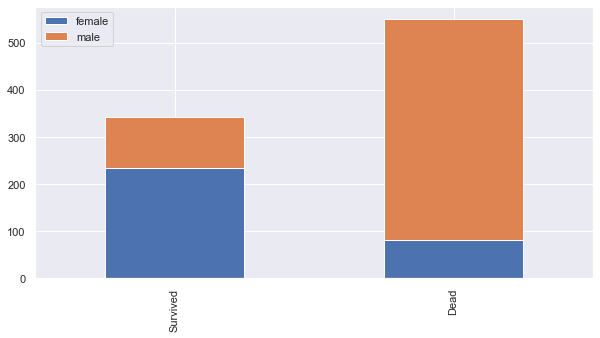

In [7]:
#分別秀出生還/死亡的男女長條圖
bar_chart('Sex')

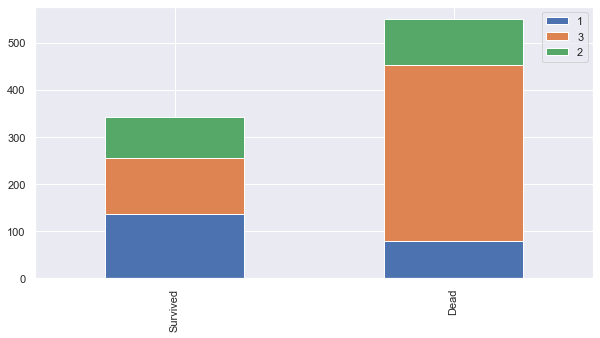

In [8]:
#分別秀出生還/死亡的艙等長條圖
bar_chart('Pclass')

In [9]:
# 計算各個行(欄位)裡有多少個“NaN”
dataset.isna().sum()#他是特殊的字元不能用字串表示,如sataset.isin(['NaN']).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [10]:
#觀察Name欄位
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#取出Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [12]:
#統計各稱謂的人數
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [13]:
#titlemapping
title_mapping = {"Mr": 0,"Miss": 1, "Mrs": 2}
dataset['Title'] = dataset['Title'].map(title_mapping)
dataset['Title'] = dataset['Title'].fillna(3)

In [14]:
#現在的dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


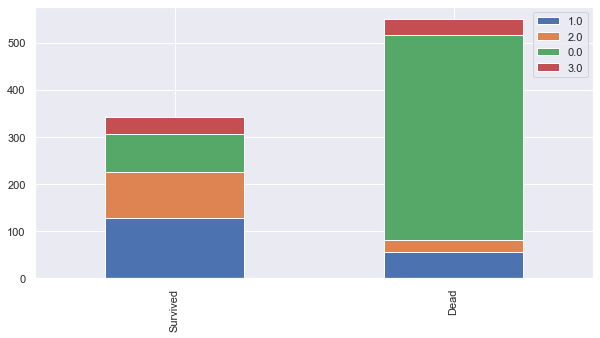

In [15]:
#秀出Title/生還死亡的分佈
bar_chart('Title')

In [16]:
# 刪除Name欄位
del dataset['Name']
#??.??('?', axis = ?, inplace = True)

In [17]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# Sex

In [18]:
#mapping sex
sex_mapping = {'male': 0, 'female': 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

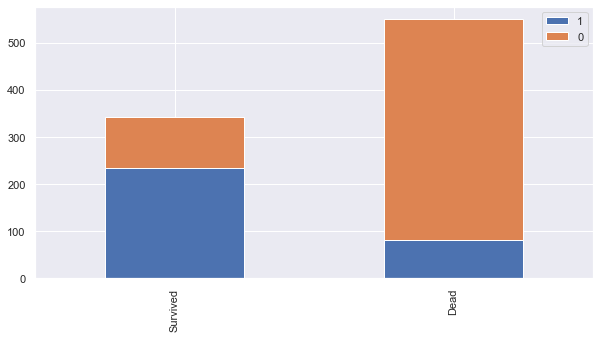

In [19]:
bar_chart('Sex')

In [20]:
#目前的ddataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


# Age

In [21]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

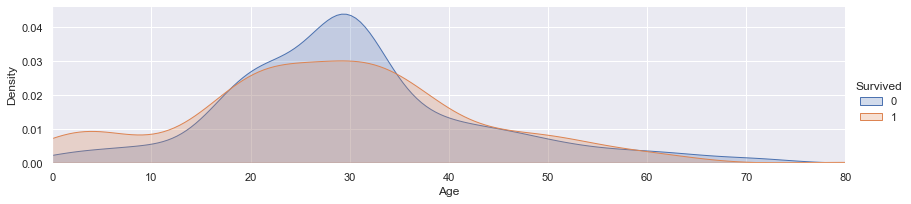

In [22]:
#年齡/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [23]:
#依年齡區間做mapping function
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [24]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


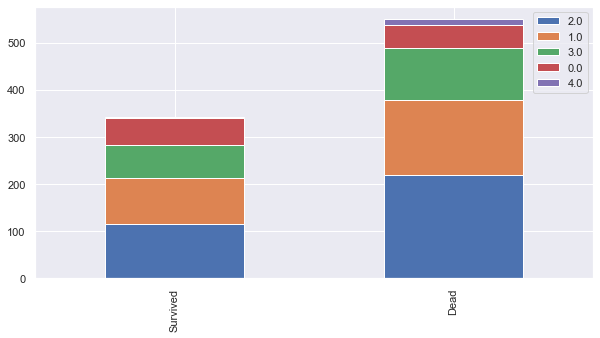

In [25]:
#秀出年齡/生還死亡的分佈
bar_chart('Age')

# Embarked (登船地點)

<AxesSubplot:>

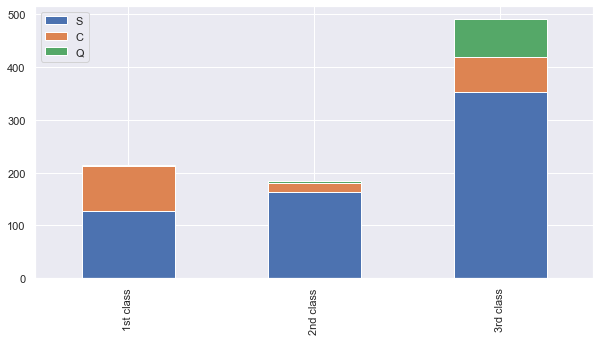

In [26]:
#分析各票種登船地點人數
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [27]:
#填補登船地點缺失資料
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2.0


In [28]:
# 登船地點的Mapping Function
embarked_mapping = {'S': 0, 'C':1, 'Q':2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0.0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0.0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0.0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2.0


# Fare(票價)

In [29]:
#填補票價缺失的資料
dataset["Fare"].fillna(dataset.groupby("Embarked")["Fare"].transform("median"), inplace=True)
dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2.0


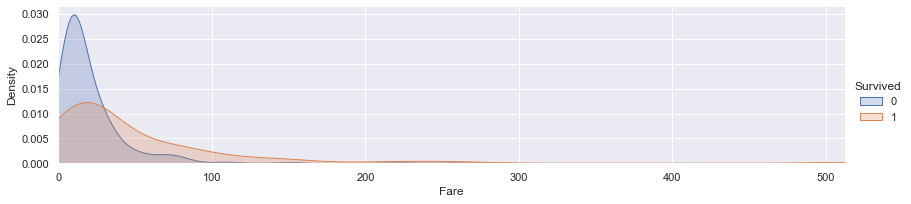

In [30]:
#票價/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [31]:
#依票價區間做mapping function
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [32]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


In [33]:
#觀察船艙編號資料
dataset['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [34]:
#觀察船艙編號資料 =>取出第一個字母
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:>

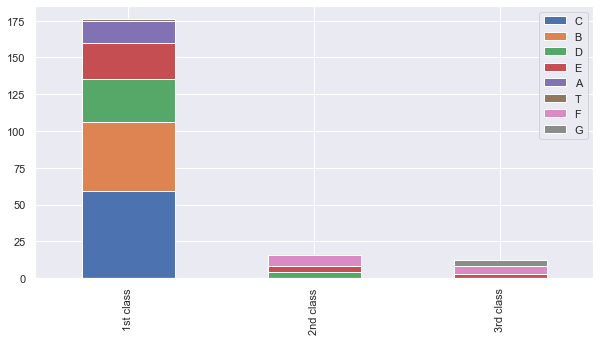

In [35]:
#分析各票種船艙種類人數
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [36]:
#船艙Mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [37]:
#填補船艙種類缺失資料
dataset["Cabin"].fillna(dataset.groupby("Fare")["Cabin"].transform("median"), inplace=True)

In [38]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.6,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.6,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,1.6,0,0.0


# Sibsp & Parch

In [39]:
#合併Sibsp & Parch
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1#要加上自己

(0.0, 11.0)

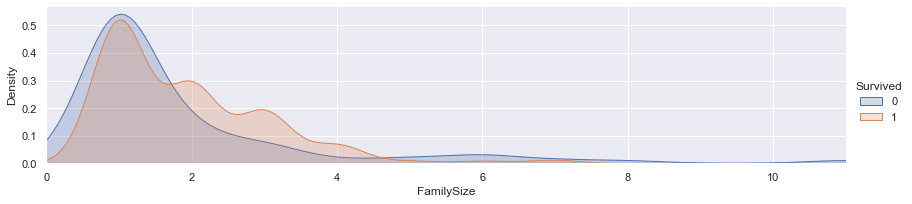

In [40]:
#家族人口/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [41]:
#家族人口的Mapping Function
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6,
                 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [42]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.6,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.6,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,1.6,0,0.0,0.0


# 資料清洗

In [43]:
#刪除Sibsp, Parch, Ticket
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
dataset = dataset.drop(features_drop, axis=1)

In [44]:
#設定預測目標變數與解釋變數
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset['Survived']

#survived為series，加入中括號轉成dataframe
dataset_target2 = dataset[['Survived']]

dataset_data.shape, dataset_target.shape,dataset_target2.shape

((891, 8), (891,), (891, 1))

In [45]:
#目前的所有解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,1.6,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,1.6,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,1.6,0,0.0,0.0


In [46]:
#確認欄位的資料型態均為數值型別
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    float64
 7   FamilySize  891 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


# 建置模型-DNN

In [47]:
#導入keras與sklearn
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from sklearn import preprocessing

In [48]:
#建立模型函式
def build_model():
    #建立模型
    model = Sequential()
    #將模型疊起
    model.add(Dense(input_dim=8, units=40))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [49]:
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')#不同回合的變化
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [50]:
#feature標準化
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaleFeatures=minmax_scale.fit_transform(dataset_data)

In [51]:
#訓練模型
model = build_model()

#開始訓練模型
model.compile(loss='binary_crossentropy',
              optimizer="adam",
             metrics=['acc'])
train_history = model.fit(scaleFeatures,dataset_target2,validation_split=0.2,batch_size=30,epochs=20)

#顯示訓練結果
score = model.evaluate(x=scaleFeatures, y=dataset_target2)
print ('\nTrain Loss:', score[0])
print ('\nTrain Acc:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                360       
_________________________________________________________________
activation (Activation)      (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

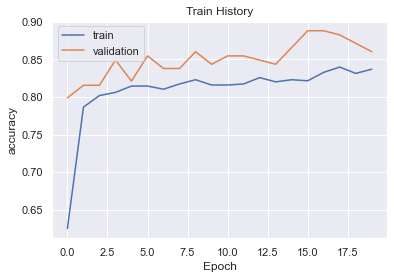

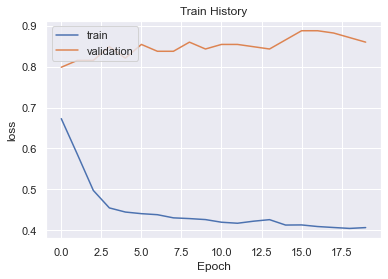

In [52]:
#顯示訓練結果
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_acc','loss')

# 測試模型

In [53]:
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    float64
 7   FamilySize  891 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


In [54]:
#將測試資料按照和訓練資料一樣的方式做欄位的轉換
df = pd.read_csv('input/test-rosejack.csv')
#填補船艙種類缺失資料
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {"Mr": 0,"Miss": 1, "Mrs": 2}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(3)
del df['Name']
sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
df.loc[ df['Age'] > 62, 'Age'] = 4
df['Embarked'] = df['Embarked'].fillna('S')
embarked_mapping = {'S': 0, 'C':1, 'Q':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df["Fare"].fillna(df.groupby("Embarked")["Fare"].transform("median"), inplace=True)
df.loc[ df['Fare'] <= 17, 'Fare'] = 0
df.loc[ (df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1
df.loc[ (df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2
df.loc[ df['Fare'] > 100, 'Fare'] = 3
df['Cabin'] = df['Cabin'].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
df['Cabin'] = df['Cabin'].map(cabin_mapping)
df["Cabin"].fillna(df.groupby("Fare")["Cabin"].transform("median"), inplace=True)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1#要加上自己
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6,
                 11: 4}
df['FamilySize'] = df['FamilySize'].map(family_mapping)
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
df = df.drop(features_drop, axis=1)
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaleFeatures=minmax_scale.fit_transform(df)

In [55]:
#使用model.predict預測生還機率
probability = model.predict(df)
probability

array([[0.00295085],
       [0.33199573]], dtype=float32)

In [56]:
#獲得模型的weights
w, b = model.layers[0].get_weights()
print("weights = {}, \n\n biases= {}".format(w, b))

weights = [[ 0.00222658  0.18615833  0.18246308  0.34976453 -0.02270218 -0.27448243
  -0.06452262  0.15501644 -0.07961158  0.04408792 -0.1394385  -0.2533202
   0.20862892 -0.1404458   0.24512321  0.27744853 -0.29082504 -0.0996483
   0.0005749   0.33933923  0.12909295 -0.20290841  0.19453357 -0.03622329
   0.34955233 -0.1592893  -0.31396198  0.1617429   0.32268634  0.12396666
  -0.13595073  0.3889759  -0.31879333  0.3461505  -0.3248469  -0.31490737
   0.03319318  0.03332506  0.05711171  0.33684576]
 [-0.20697196  0.2958173  -0.14393589 -0.01633155 -0.18880159  0.23035957
   0.3470355   0.0410298  -0.09593931 -0.02196088 -0.36589536 -0.13601589
  -0.27286547 -0.31562304  0.15992771 -0.08324631  0.43107226  0.0054576
   0.25493982 -0.11229044  0.14834104 -0.17962427 -0.11605801 -0.38193017
   0.19151947 -0.27706936  0.2416738  -0.13206331 -0.32422373  0.29503828
   0.19354042  0.01036204  0.02043138 -0.34501764 -0.28230447  0.04804149
  -0.04795146  0.35560602  0.02224521 -0.16587605]
 [ 

In [57]:
#儲存模型
model.save('dnnfortitanic.h5')

In [58]:
#下次要使用模型時
from keras.models import load_model
model=load_model('dnnfortitanic.h5')

In [59]:
#import package
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math

In [60]:
# 開啟 CSV 檔案
testset= pd.read_csv('input/test.csv')

#填補船艙種類缺失資料
testset['Title'] = testset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {"Mr": 0,"Miss": 1, "Mrs": 2}
testset['Title'] = testset['Title'].map(title_mapping)
testset['Title'] = testset['Title'].fillna(3)
del testset['Name']
sex_mapping = {'male': 0, 'female': 1}
testset['Sex'] = testset['Sex'].map(sex_mapping)
testset["Age"].fillna(testset.groupby("Title")["Age"].transform("median"), inplace=True)
testset.loc[ testset['Age'] <= 16, 'Age'] = 0
testset.loc[(testset['Age'] > 16) & (testset['Age'] <= 26), 'Age'] = 1
testset.loc[(testset['Age'] > 26) & (testset['Age'] <= 36), 'Age'] = 2
testset.loc[(testset['Age'] > 36) & (testset['Age'] <= 62), 'Age'] = 3
testset.loc[ testset['Age'] > 62, 'Age'] = 4
testset['Embarked'] = testset['Embarked'].fillna('S')
embarked_mapping = {'S': 0, 'C':1, 'Q':2}
testset['Embarked'] = testset['Embarked'].map(embarked_mapping)
testset["Fare"].fillna(testset.groupby("Embarked")["Fare"].transform("median"), inplace=True)
testset.loc[ testset['Fare'] <= 17, 'Fare'] = 0
testset.loc[ (testset['Fare'] > 17) & (testset['Fare'] <= 30), 'Fare'] = 1
testset.loc[ (testset['Fare'] > 30) & (testset['Fare'] <= 100), 'Fare'] = 2
testset.loc[ testset['Fare'] > 100, 'Fare'] = 3
testset['Cabin'] = testset['Cabin'].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
testset['Cabin'] = testset['Cabin'].map(cabin_mapping)
testset["Cabin"].fillna(testset.groupby("Fare")["Cabin"].transform("median"), inplace=True)
testset["FamilySize"] = testset["SibSp"] + testset["Parch"] + 1#要加上自己
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6,
                 11: 4}
testset['FamilySize'] = testset['FamilySize'].map(family_mapping)
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
testset = testset.drop(features_drop, axis=1)
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaleFeatures=minmax_scale.fit_transform(testset)

In [61]:
#svm
#引入library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#10-fold cross-validation
kfold = KFold(n_splits = 10,shuffle= True)
predicted = []
expected = []

In [62]:
#訓練模型
#會出現warning為正常現象，不用理會，也可以另外寫code去ignore
for train, test in kfold.split(dataset):
    X_train= dataset_data.iloc[train]
    Y_train = dataset_target2.iloc[train]
    X_test = dataset_data.iloc[test]
    Y_test = dataset_target2.iloc[test]
    svm = OneVsRestClassifier(SVC(gamma='scale')).fit(X_train,Y_train)
    expected.extend(Y_test)

In [63]:
#預測
predicted=svm.predict(testset)
predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [64]:
#存csv
testdata_write = pd.read_csv('input/test.csv')
submission = pd.DataFrame({
                            "PassengerId": testdata_write['PassengerId'],
                            "Survived": predicted
                         })
submission.to_csv('SVM_submission.csv', index=False)

In [65]:
#訓練模型
for train, test in kfold.split(dataset):
    X_train= dataset_data.iloc[train]
    Y_train = dataset_target2.iloc[train]
    X_test = dataset_data.iloc[test]
    Y_test = dataset_target2.iloc[test]
    forest = ensemble.RandomForestClassifier(n_estimators = 100)
    forest.fit(X_train,Y_train)
    expected.extend(Y_test)

C:\Users\mings\AppData\Local\Temp\ipykernel_6612\4202041076.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,Y_train)
C:\Users\mings\AppData\Local\Temp\ipykernel_6612\4202041076.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,Y_train)
C:\Users\mings\AppData\Local\Temp\ipykernel_6612\4202041076.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,Y_train)
C:\Users\mings\AppData\Local\Temp\ipykernel_6612\4202041076.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,Y_tra

In [66]:
#預測
predicted=forest.predict(testset)
predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [67]:
#存csv
testdata_write = pd.read_csv('input/test.csv')
submission = pd.DataFrame({
                            "PassengerId": testdata_write['PassengerId'],
                            "Survived": predicted
                         })
submission.to_csv('Forest_submission.csv', index=False)

In [68]:
#下次要使用模型時
from keras.models import load_model
model=load_model('dnnfortitanic.h5')

In [69]:
#使用model.predict預測生還機率
probability = model.predict(testset)
probability

array([[1.14262104e-03],
       [8.03083181e-04],
       [7.16507435e-04],
       [1.36372447e-03],
       [4.77495790e-03],
       [5.92187047e-03],
       [2.40340829e-03],
       [5.77971339e-03],
       [2.53650844e-02],
       [2.45022774e-03],
       [1.36372447e-03],
       [9.94294882e-03],
       [7.15477645e-01],
       [9.47296619e-04],
       [4.10368741e-02],
       [8.56947601e-02],
       [2.27394700e-03],
       [4.01386619e-03],
       [1.68517232e-03],
       [1.23295188e-03],
       [4.79739904e-03],
       [2.92598665e-01],
       [4.82233465e-02],
       [3.46336663e-02],
       [2.58433819e-03],
       [3.21120024e-04],
       [2.85332441e-01],
       [4.01386619e-03],
       [1.86620057e-02],
       [1.27515197e-03],
       [2.46128440e-03],
       [6.65631890e-03],
       [1.39740109e-03],
       [4.88191843e-04],
       [1.27149820e-02],
       [4.01386619e-03],
       [7.21269846e-03],
       [7.21269846e-03],
       [2.95090675e-03],
       [6.65250421e-03],


In [70]:
#存csv
testdata_write = pd.read_csv('input/test.csv')
submission = pd.DataFrame({
                            "PassengerId": testdata_write['PassengerId'],
                            "Survived": predicted
                         })
submission.to_csv('DNN_submission.csv', index=False)